In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_data():
    train_data = datasets.CIFAR100(root='./dataset/cifar-100/', train=True, download=True)
    test_data = datasets.CIFAR100(root='./dataset/cifar-100/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading CIFAR100 train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading CIFAR100 test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Files already downloaded and verified
Files already downloaded and verified


Loading CIFAR100 test data: 100%|██████████████████████████| 10000/10000 [00:00<00:00, 18063.07it/s]


Number of training samples: 50000 
Number of test samples: 10000 
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Train Class Distribution: [500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500]
Test Class Distribution: [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 10

In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=1536
entrySize=3072
input_addr_length=2


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [04:51<00:00, 34.31it/s]


Accuracy:   0.01
Total Training Execution Time: 253.18 seconds


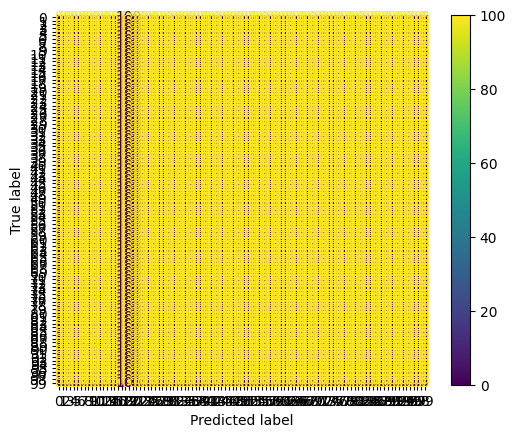

num_of_htables=768
entrySize=3072
input_addr_length=4


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [04:08<00:00, 40.19it/s]


Accuracy:   0.01
Total Training Execution Time: 157.54 seconds


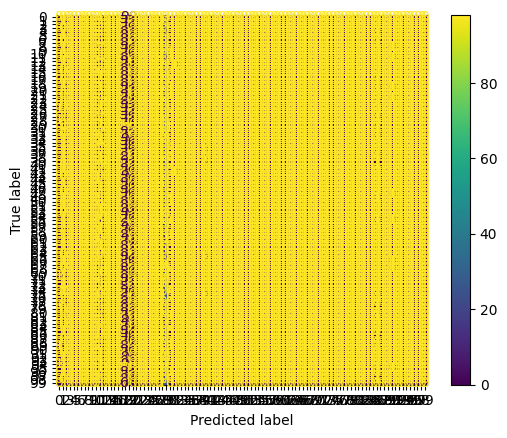

num_of_htables=512
entrySize=3072
input_addr_length=6


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [03:44<00:00, 44.48it/s]


Accuracy:   0.19
Total Training Execution Time: 129.93 seconds


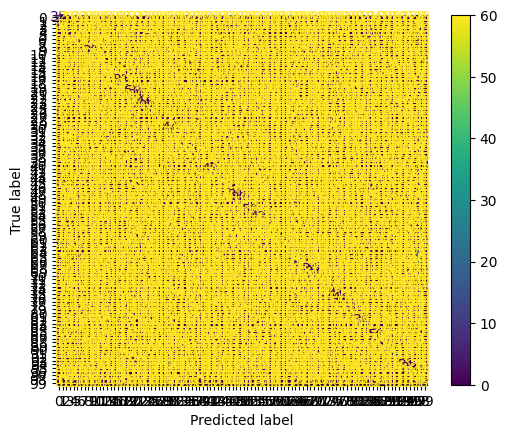

num_of_htables=384
entrySize=3072
input_addr_length=8


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [02:38<00:00, 62.93it/s]


Accuracy:   0.17
Total Training Execution Time: 124.53 seconds


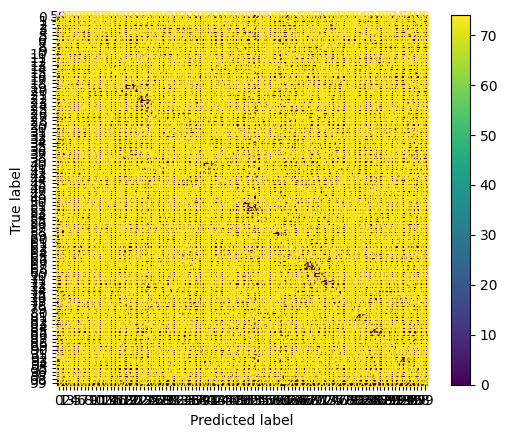

num_of_htables=307
entrySize=3072
input_addr_length=10


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [02:14<00:00, 74.49it/s]


Accuracy:   0.12
Total Training Execution Time: 113.95 seconds


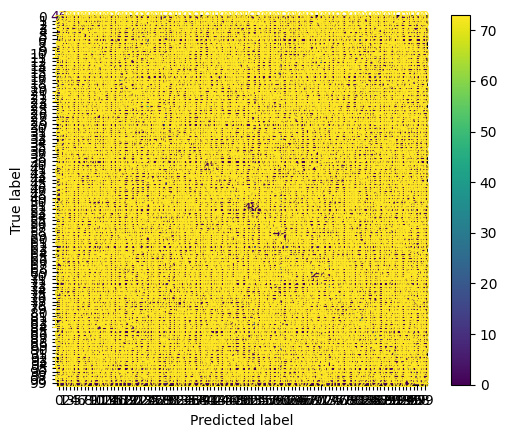

num_of_htables=256
entrySize=3072
input_addr_length=12


 Testing: 100%|███████████████████████████████████████████████| 10000/10000 [01:46<00:00, 93.64it/s]


Accuracy:   0.07
Total Training Execution Time: 119.08 seconds


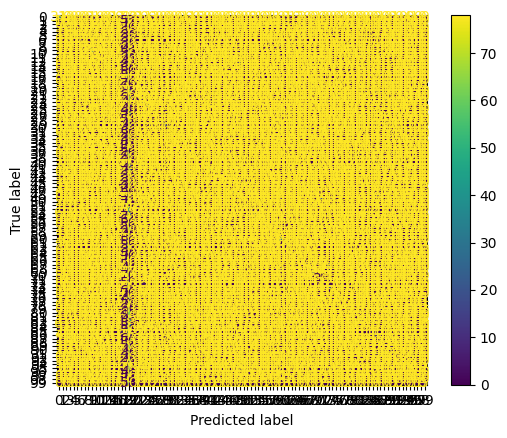

num_of_htables=219
entrySize=3072
input_addr_length=14


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:27<00:00, 113.83it/s]


Accuracy:   0.03
Total Training Execution Time: 105.86 seconds


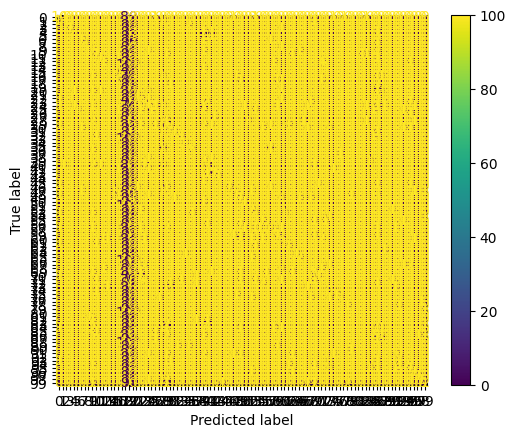

num_of_htables=192
entrySize=3072
input_addr_length=16


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:23<00:00, 119.44it/s]


Accuracy:   0.02
Total Training Execution Time: 104.82 seconds


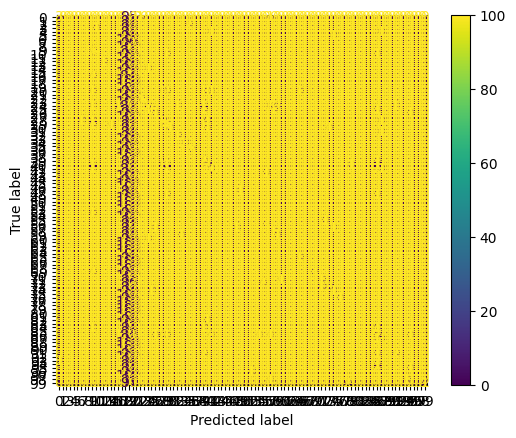

num_of_htables=170
entrySize=3072
input_addr_length=18


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:12<00:00, 137.79it/s]


Accuracy:   0.02
Total Training Execution Time: 105.77 seconds


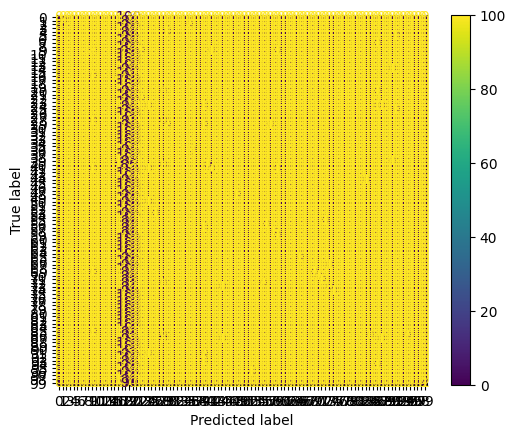

num_of_htables=153
entrySize=3072
input_addr_length=20


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:07<00:00, 149.03it/s]


Accuracy:   0.01
Total Training Execution Time: 99.81 seconds


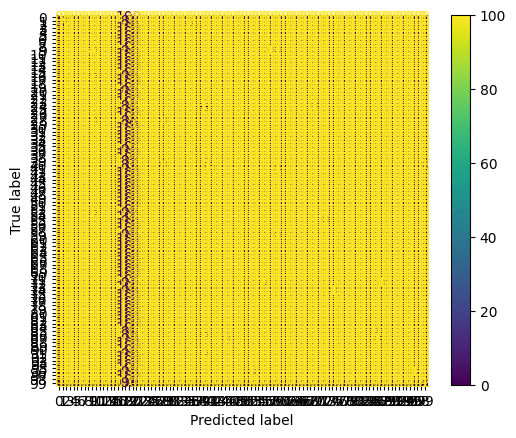

num_of_htables=139
entrySize=3072
input_addr_length=22


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:08<00:00, 145.65it/s]


Accuracy:   0.01
Total Training Execution Time: 99.59 seconds


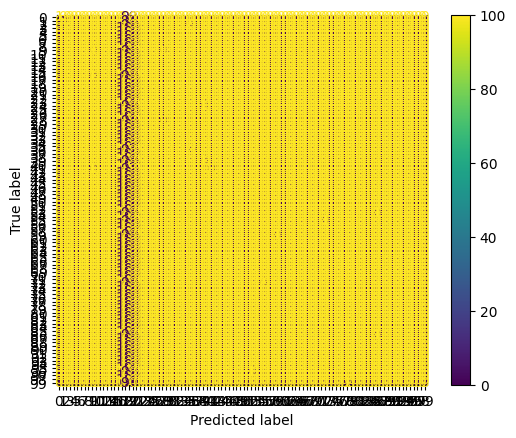

num_of_htables=128
entrySize=3072
input_addr_length=24


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [01:06<00:00, 150.97it/s]


Accuracy:   0.01
Total Training Execution Time: 105.26 seconds


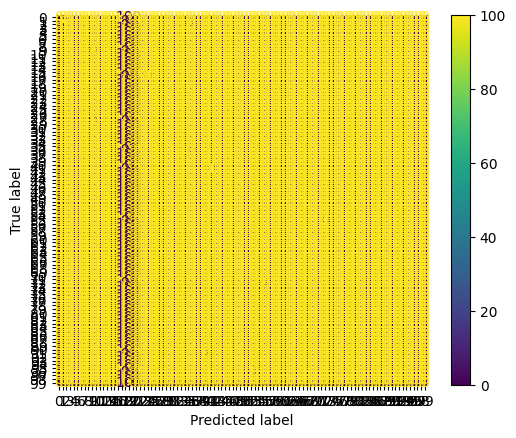

num_of_htables=118
entrySize=3072
input_addr_length=26


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:57<00:00, 172.72it/s]


Accuracy:   0.01
Total Training Execution Time: 99.93 seconds


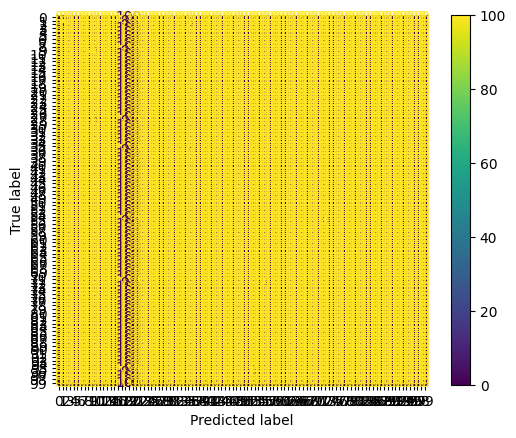

num_of_htables=109
entrySize=3072
input_addr_length=28


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:52<00:00, 190.18it/s]


Accuracy:   0.01
Total Training Execution Time: 96.25 seconds


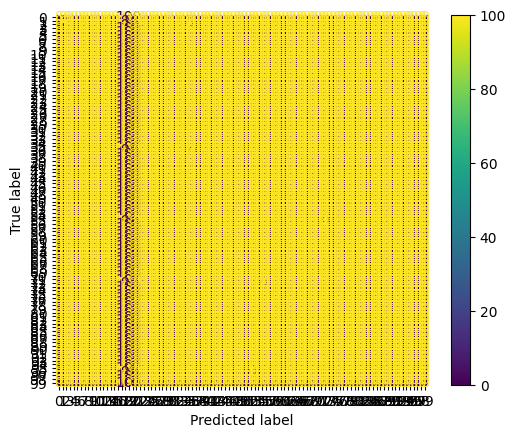

num_of_htables=102
entrySize=3072
input_addr_length=30


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:49<00:00, 202.93it/s]


Accuracy:   0.01
Total Training Execution Time: 93.75 seconds


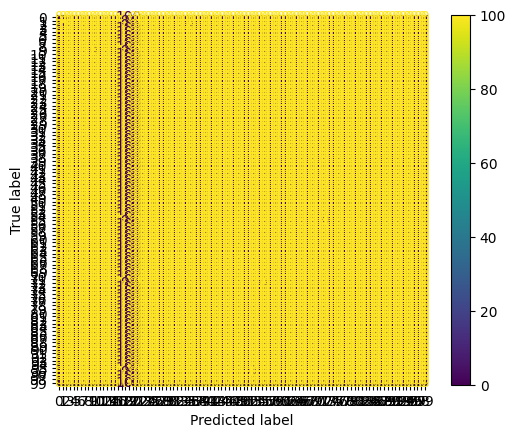

num_of_htables=96
entrySize=3072
input_addr_length=32


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:52<00:00, 191.69it/s]


Accuracy:   0.01
Total Training Execution Time: 92.54 seconds


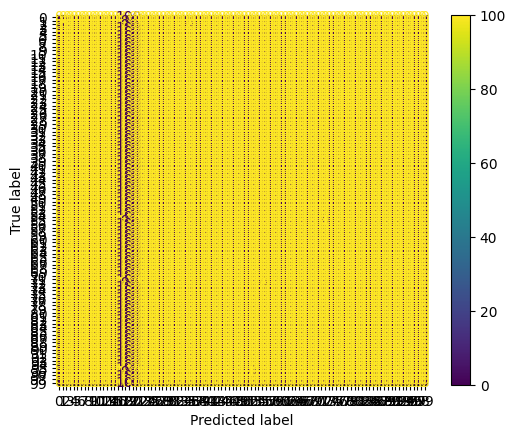

num_of_htables=90
entrySize=3072
input_addr_length=34


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:46<00:00, 212.84it/s]


Accuracy:   0.01
Total Training Execution Time: 93.19 seconds


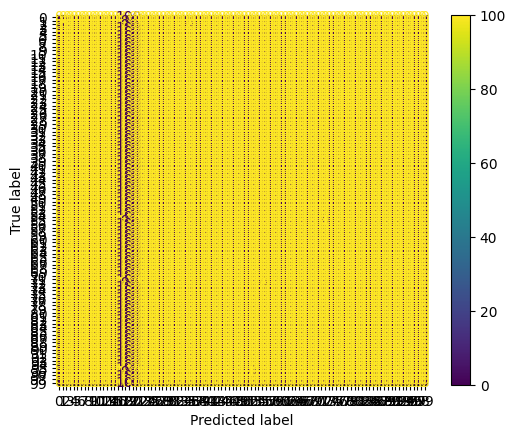

num_of_htables=85
entrySize=3072
input_addr_length=36


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:43<00:00, 229.78it/s]


Accuracy:   0.01
Total Training Execution Time: 92.21 seconds


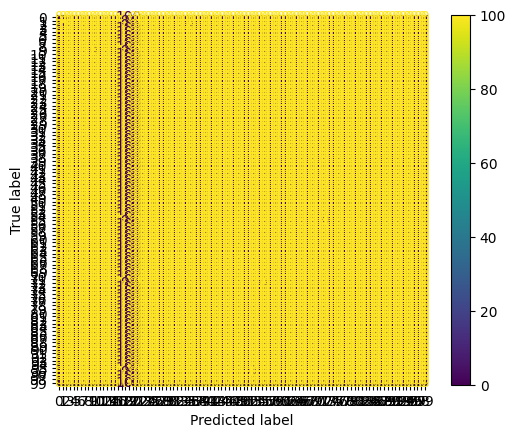

num_of_htables=80
entrySize=3072
input_addr_length=38


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:48<00:00, 204.35it/s]


Accuracy:   0.01
Total Training Execution Time: 92.32 seconds


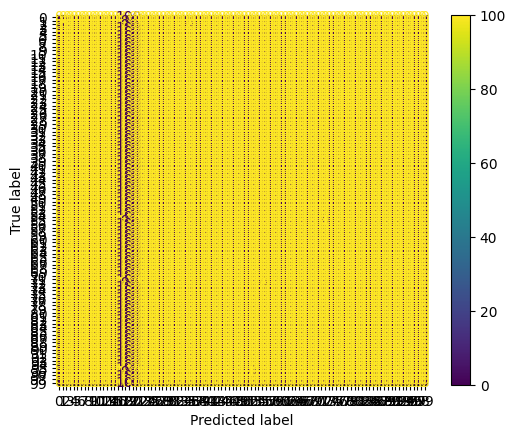

num_of_htables=76
entrySize=3072
input_addr_length=40


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:39<00:00, 251.14it/s]


Accuracy:   0.01
Total Training Execution Time: 90.51 seconds


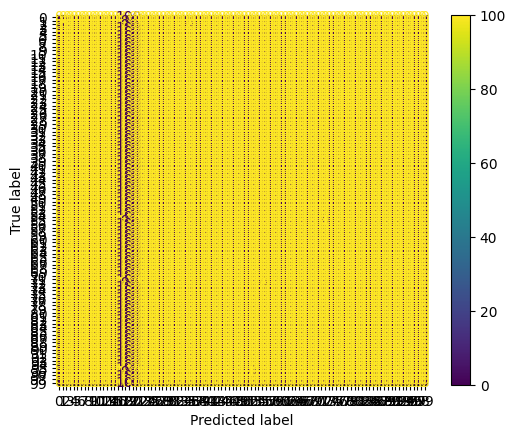

num_of_htables=73
entrySize=3072
input_addr_length=42


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:42<00:00, 235.91it/s]


Accuracy:   0.01
Total Training Execution Time: 93.50 seconds


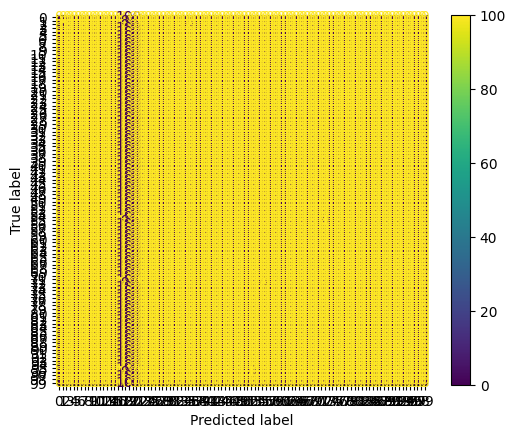

num_of_htables=69
entrySize=3072
input_addr_length=44


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:37<00:00, 269.95it/s]


Accuracy:   0.01
Total Training Execution Time: 88.48 seconds


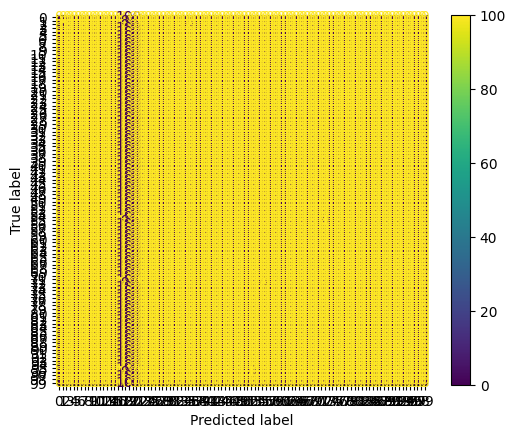

num_of_htables=66
entrySize=3072
input_addr_length=46


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:38<00:00, 262.28it/s]


Accuracy:   0.01
Total Training Execution Time: 91.10 seconds


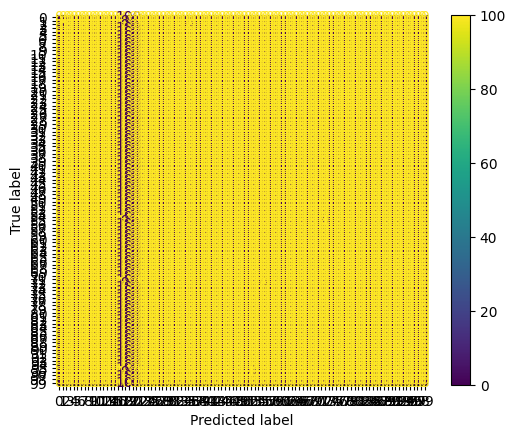

num_of_htables=64
entrySize=3072
input_addr_length=48


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:40<00:00, 248.91it/s]


Accuracy:   0.01
Total Training Execution Time: 93.56 seconds


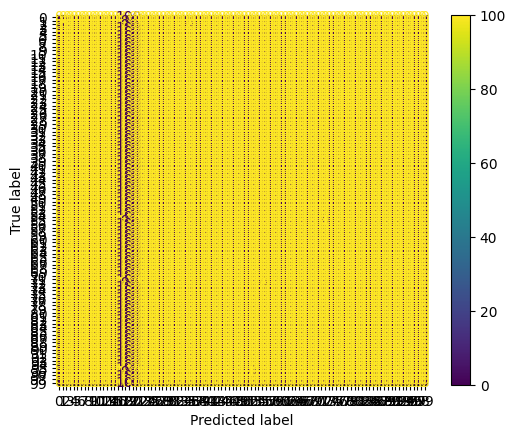

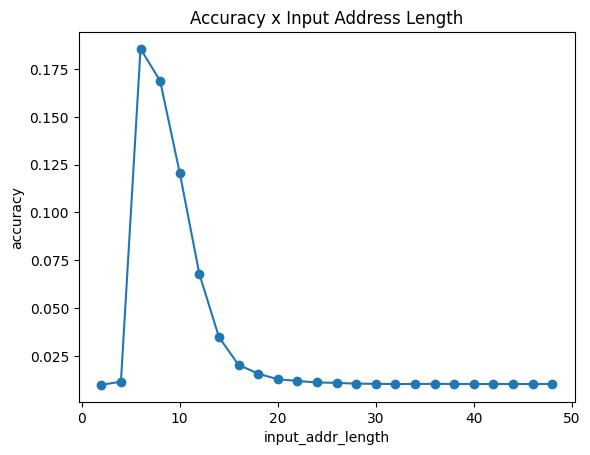

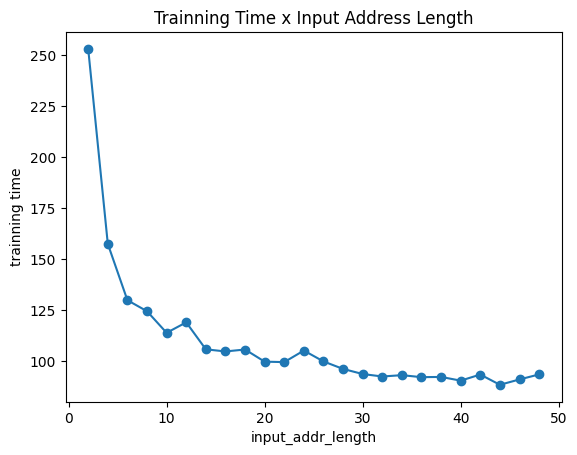

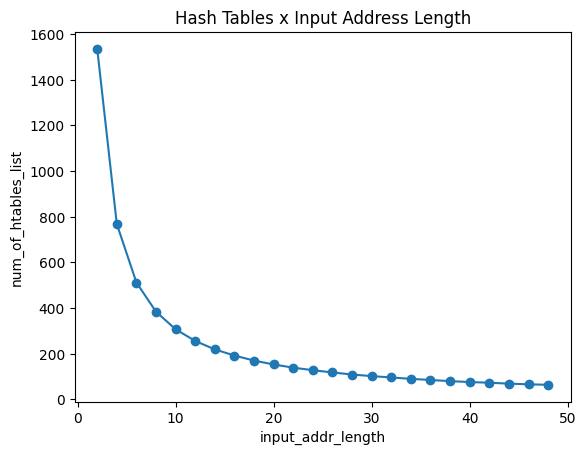

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2            1536    0.0100      253.182093
                 4             768    0.0116      157.538524
                 6             512    0.1855      129.931960
                 8             384    0.1687      124.534072
                10             307    0.1207      113.952366
                12             256    0.0679      119.076738
                14             219    0.0349      105.863142
                16             192    0.0204      104.815398
                18             170    0.0158      105.771104
                20             153    0.0129       99.810795
                22             139    0.0120       99.591801
                24             128    0.0112      105.260451
                26             118    0.0110       99.929443
                28             109    0.0106       96.249800
                30             102    0.0105       93.753877
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))